<a href="https://colab.research.google.com/github/liyachittilappilly/ImageDetection/blob/main/ImgDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving images.jpg to images.jpg


Saving vespa-pink-scooter-electric-ride-on-for-kids-3-8-year-45-rvk-pal-original-imah853fjtxwnmmr.webp to vespa-pink-scooter-electric-ride-on-for-kids-3-8-year-45-rvk-pal-original-imah853fjtxwnmmr.webp


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


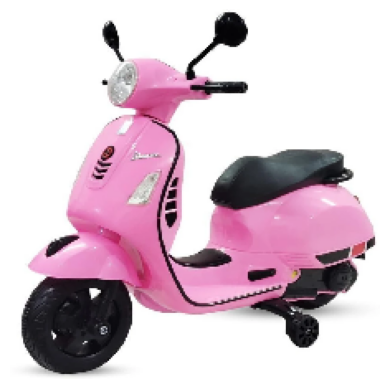

In [1]:
# Upload your image
from google.colab import files
uploaded = files.upload()  # Upload your image file here

# Import required libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display, HTML

# Display styled heading
display(HTML('''
    <h1 style="color: #C71585; font-size: 42px; font-weight: bold; text-align: center; font-family: Georgia, serif;">
        Image Detection App
    </h1>
'''))

# Change this to the uploaded filename (get it dynamically)
img_path = next(iter(uploaded))  # Gets the first uploaded file name

# Check if image exists
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image not found: {img_path}")

# Load model
model = MobileNetV2(weights='imagenet')

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

# Display top 3 predictions with elegant font
styled_result = "<div style='font-family: Trebuchet MS, Georgia, serif; font-size: 22px; color: #333; text-align: center;'>"
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    styled_result += f"<p><strong>{i + 1}. {label}</strong>: {score * 100:.2f}%</p>"
styled_result += "</div>"

display(HTML(styled_result))


In [ ]:
print(uploaded.keys())



dict_keys(['images.jpg'])
